# General imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
# Load the data
df = pd.read_csv('data.csv')

In [4]:
df.head()

,index,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,LATITUDE,LONGITUDE,YEAR_SOLD,MONTH_SOLD
0,0,1,01 ONE FAMILY HOMES,1,S1,15 Ave D,10009.0,1.0,1.0,826.0,2240.0,1,S1,593362.0,40.720597,-73.978534,2010,4
1,1,1,02 TWO FAMILY HOMES,1,S2,91 Ave D,10009.0,2.0,1.0,994.0,3799.0,1,S2,1320000.0,40.723003,-73.976803,2010,2
2,2,1,03 THREE FAMILY HOMES,1,C0,326 E 4 St,10009.0,3.0,0.0,2204.0,3921.0,1,C0,900000.0,40.721688,-73.979215,2010,12
3,3,1,04 TAX CLASS 1 CONDOS,1C,R6,238 E 4 St,10009.0,1.0,0.0,0.0,0.0,1,R6,3027375.0,40.723304,-73.982980,2010,8
4,4,1,07 RENTALS - WALKUP APARTMENTS,2,C7,11 Ave D,10009.0,16.0,3.0,3419.0,14400.0,2,C7,8000000.0,40.720484,-73.978618,2010,2


In [5]:
# Convert values to numeric
df['ZIP CODE'] = pd.to_numeric(df['ZIP CODE'], errors='coerce')
df['RESIDENTIAL UNITS'] = pd.to_numeric(df['RESIDENTIAL UNITS'], errors='coerce')
df['COMMERCIAL UNITS'] = pd.to_numeric(df['COMMERCIAL UNITS'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# Label encoding to convert categorical values to numeric
label_encoder = preprocessing.LabelEncoder()
df['NEIGHBORHOOD'] = label_encoder.fit_transform(df['NEIGHBORHOOD'])

In [6]:
# Drop unnecessary columns
df2 = df.drop(['index',
               'BUILDING CLASS CATEGORY',
               'TAX CLASS AT PRESENT', 
               'BUILDING CLASS AT PRESENT', 
               'TAX CLASS AT TIME OF SALE',
               'BUILDING CLASS AT TIME OF SALE',]
               , axis=1)

df2.shape

(311283, 12)

In [7]:
null_values = df2.isna()

pct_null = (null_values.mean() * 100).round(10)

print("Percentage of null values:")
print(pct_null)

Percentage of null values:
NEIGHBORHOOD         0.000000
ADDRESS              0.001285
ZIP CODE             0.000000
RESIDENTIAL UNITS    0.000000
COMMERCIAL UNITS     0.000000
LAND SQUARE FEET     0.000000
GROSS SQUARE FEET    0.000000
SALE PRICE           0.000000
LATITUDE             0.000000
LONGITUDE            0.000000
YEAR_SOLD            0.000000
MONTH_SOLD           0.000000
dtype: float64


In [8]:
print(df2.dtypes)


NEIGHBORHOOD           int64
ADDRESS               object
ZIP CODE             float64
RESIDENTIAL UNITS    float64
COMMERCIAL UNITS     float64
LAND SQUARE FEET     float64
GROSS SQUARE FEET    float64
SALE PRICE           float64
LATITUDE             float64
LONGITUDE            float64
YEAR_SOLD              int64
MONTH_SOLD             int64
dtype: object


In [9]:
# Contar o número de NaN por coluna
print(df2.isna().sum())

NEIGHBORHOOD         0
ADDRESS              4
ZIP CODE             0
RESIDENTIAL UNITS    0
COMMERCIAL UNITS     0
LAND SQUARE FEET     0
GROSS SQUARE FEET    0
SALE PRICE           0
LATITUDE             0
LONGITUDE            0
YEAR_SOLD            0
MONTH_SOLD           0
dtype: int64


In [10]:
df2.describe()

,NEIGHBORHOOD,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,LATITUDE,LONGITUDE,YEAR_SOLD,MONTH_SOLD
count,311283.000000,3.112830e+05,311283.000000,311283.000000,311283.000000,311283.000000,3.112830e+05,311283.000000,311283.000000,311283.000000,311283.000000
mean,45.548549,1.133051e+04,1.785372,0.347227,797.793224,6387.181835,2.282422e+06,40.763669,-73.976123,2010.510025,6.589380
std,20.993594,3.601436e+05,13.351147,4.000125,3591.966286,27904.025884,9.621848e+06,0.030204,0.019610,4.952774,3.356937
min,0.000000,2.780000e+03,0.000000,0.000000,0.000000,0.000000,1.000000e+00,40.527504,-74.215629,2003.000000,1.000000
25%,24.000000,1.001400e+04,0.000000,0.000000,0.000000,0.000000,3.750000e+05,40.743889,-73.987985,2006.000000,4.000000
50%,49.000000,1.002100e+04,0.000000,0.000000,0.000000,0.000000,7.490000e+05,40.764369,-73.978825,2010.000000,7.000000
75%,63.000000,1.002700e+04,1.000000,0.000000,0.000000,0.000000,1.625000e+06,40.778057,-73.962119,2015.000000,9.000000
max,76.000000,1.012848e+08,764.000000,570.000000,149560.000000,420000.000000,3.000000e+08,42.671508,-73.003462,2023.000000,12.000000


In [ ]:
# Because we added latitude and longitude information with a Geocoding API, we filter evidently wrong coordinates
from shapely.geometry import Point, Polygon

# These coordinates form a polygon that approximates Manhattan's shape
MANHATTAN_CORDS = [
    (40.698005, -74.016173),
    (40.704772, -74.021498),
    (40.756209, -74.012266),
    (40.878978, -73.929209),
    (40.875195, -73.918612),
    (40.872910, -73.909668),
    (40.863531, -73.914005),
    (40.846438, -73.927714),
    (40.834556, -73.934069),
    (40.808835, -73.933640),
    (40.800519, -73.927370),
    (40.792851, -73.929260),
    (40.781284, -73.940080),
    (40.775369, -73.940080),
    (40.741822, -73.970742),
    (40.728637, -73.964892),
    (40.710145, -73.975104),
    (40.705981, -73.997177),
    (40.699799, -74.004993),
    (40.698005, -74.016173)  # Back to start
]

CENTRAL_PARK_CORDS = [
    (40.768234, -73.981008),
    (40.800278, -73.958016),
    (40.796762, -73.949710),
    (40.765106, -73.973197),
    (40.768234, -73.981008)  # Back to start
]

# Create polygons
MANHATTAN_POLY = Polygon(MANHATTAN_CORDS)
CENTRAL_PARK_POLY = Polygon(CENTRAL_PARK_CORDS)

def FilterManhattanCoordinates(df):
    # Create a mask for points within Manhattan
    def IsInManhattan(row):
        point = Point(row['LATITUDE'], row['LONGITUDE'])
        return MANHATTAN_POLY.contains(point) and not CENTRAL_PARK_POLY.contains(point) # It needs to be inside Manhattan but outside Central Park

    # Apply the filter
    manhattan_mask = df.apply(IsInManhattan, axis=1)
    manhattan_df = df[manhattan_mask].copy()

    return manhattan_df

# Filter coordinates outside Manhattan
df3 = FilterManhattanCoordinates(df2)

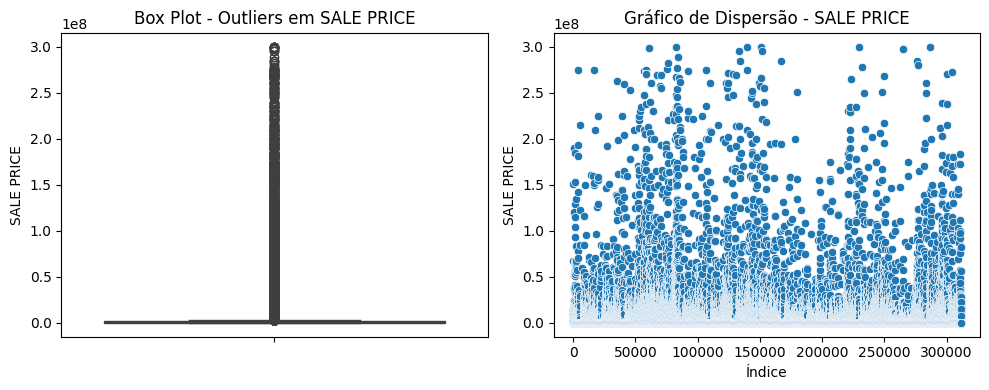

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Box plot
sns.boxplot(y=df3["SALE PRICE"], ax=ax1)
ax1.set_title("Box Plot - Outliers em SALE PRICE")
ax1.set_ylabel("SALE PRICE")

# Scatter plot
sns.scatterplot(x=df3.index, y=df3["SALE PRICE"], ax=ax2)
ax2.set_title("Gráfico de Dispersão - SALE PRICE")
ax2.set_xlabel("Índice")
ax2.set_ylabel("SALE PRICE")

plt.tight_layout()
plt.show()

In [13]:
df3.shape

(309562, 12)

In [14]:
free_properties = df3[df3['SALE PRICE'] <= 10000]
free_properties.shape

(7420, 12)

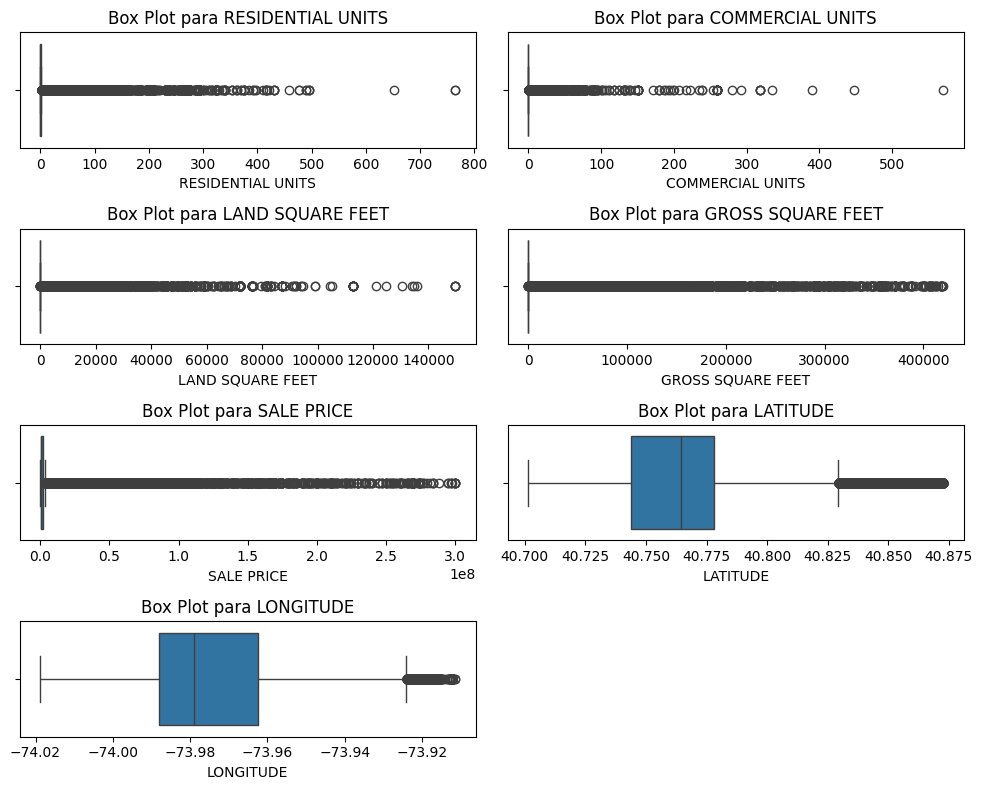

In [15]:
# Selecionar apenas as colunas numéricas
numeric_df = df3.select_dtypes(include=['number'])

numeric_df = numeric_df.drop(columns=['ZIP CODE', 'NEIGHBORHOOD', 'MONTH_SOLD', 'YEAR_SOLD'])

# Definir o número de subplots
num_cols = len(numeric_df.columns)
num_rows = (num_cols + 1) // 2  # Two plots per row
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 2*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Criar um box plot para cada coluna numérica
for i, col in enumerate(numeric_df.columns):
    sns.boxplot(x=numeric_df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot para {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [16]:
# Remove outliers
df4 = df3.drop(df[df["LAND SQUARE FEET"] > 120_000].index)
df4 = df3.drop(df[df["COMMERCIAL UNITS"] > 400].index)
df4 = df3.drop(df[df["RESIDENTIAL UNITS"] > 600].index)

In [17]:
# Check for values equal to 0
for col in df4.columns:
    print(f"Valores igual a 0: {col} = {df4[df4[col] == 0].shape[0]}")

Valores igual a 0: NEIGHBORHOOD = 438
Valores igual a 0: ADDRESS = 0
Valores igual a 0: ZIP CODE = 0
Valores igual a 0: RESIDENTIAL UNITS = 175425
Valores igual a 0: COMMERCIAL UNITS = 264753
Valores igual a 0: LAND SQUARE FEET = 270799
Valores igual a 0: GROSS SQUARE FEET = 268581
Valores igual a 0: SALE PRICE = 0
Valores igual a 0: LATITUDE = 0
Valores igual a 0: LONGITUDE = 0
Valores igual a 0: YEAR_SOLD = 0
Valores igual a 0: MONTH_SOLD = 0


In [18]:
# Supondo que o seu DataFrame se chame df
# e que as colunas se chamem exatamente 'LAND SQUARE FEET' e 'GROSS SQUARE FEET'
linhas_zeros = df4[(df4['LAND SQUARE FEET'] == 0) & (df4['GROSS SQUARE FEET'] == 0)].shape[0]

print("Número de linhas onde ambos LAND SQUARE FEET e GROSS SQUARE FEET são 0:", linhas_zeros)


Número de linhas onde ambos LAND SQUARE FEET e GROSS SQUARE FEET são 0: 267351


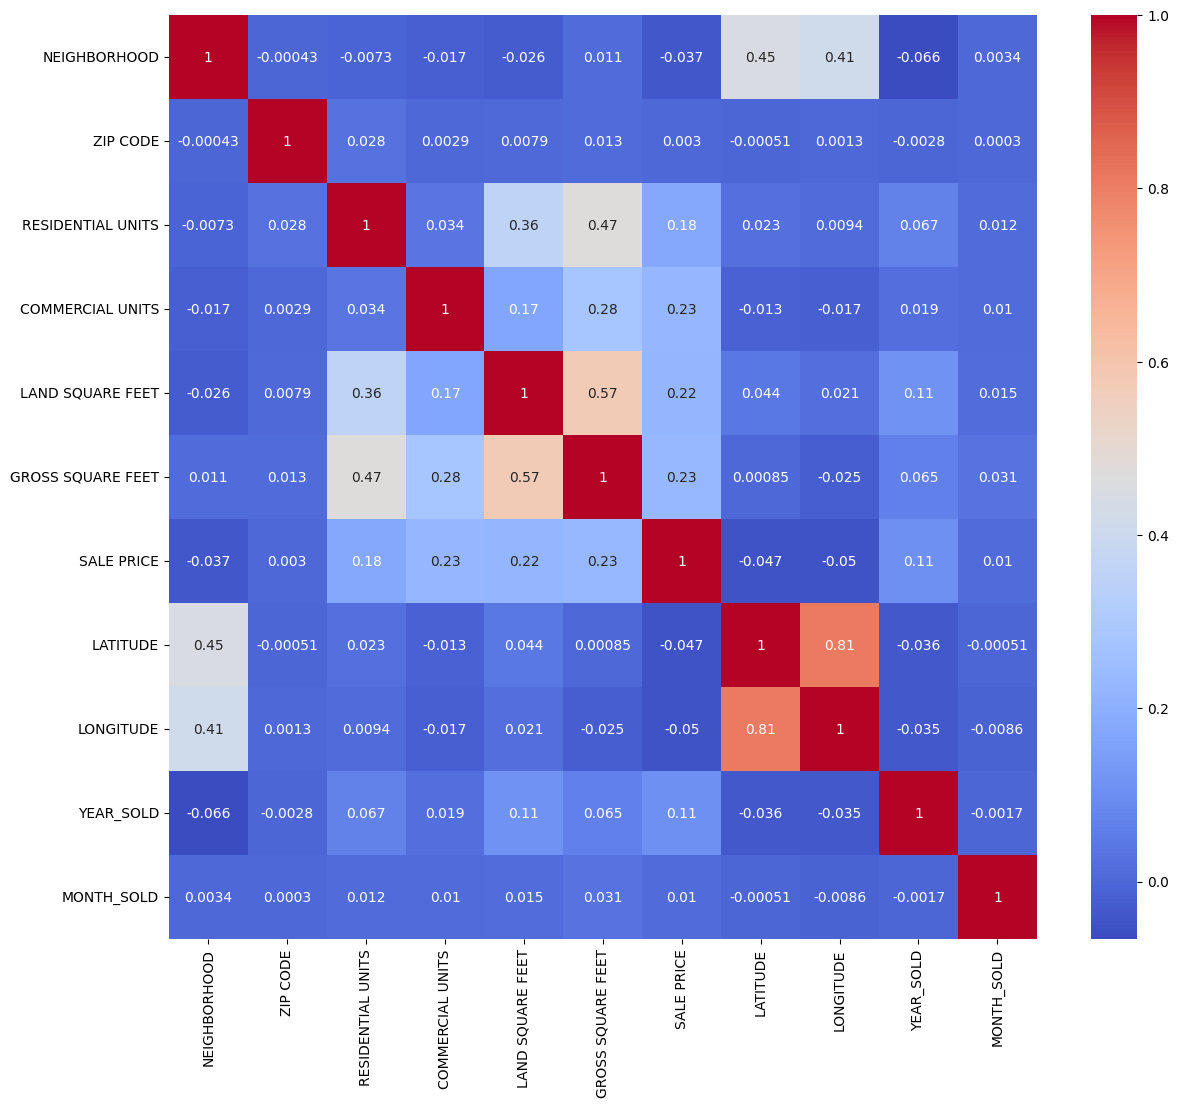

In [19]:
# Calcular a correlação e criar o heatmap
numeric_df = df4.select_dtypes(include=['number'])

plt.figure(figsize=(14, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
df4.info()


<class 'pandas.core.frame.DataFrame'>
Index: 309559 entries, 0 to 311282
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NEIGHBORHOOD       309559 non-null  int64  
 1   ADDRESS            309555 non-null  object 
 2   ZIP CODE           309559 non-null  float64
 3   RESIDENTIAL UNITS  309559 non-null  float64
 4   COMMERCIAL UNITS   309559 non-null  float64
 5   LAND SQUARE FEET   309559 non-null  float64
 6   GROSS SQUARE FEET  309559 non-null  float64
 7   SALE PRICE         309559 non-null  float64
 8   LATITUDE           309559 non-null  float64
 9   LONGITUDE          309559 non-null  float64
 10  YEAR_SOLD          309559 non-null  int64  
 11  MONTH_SOLD         309559 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 30.7+ MB


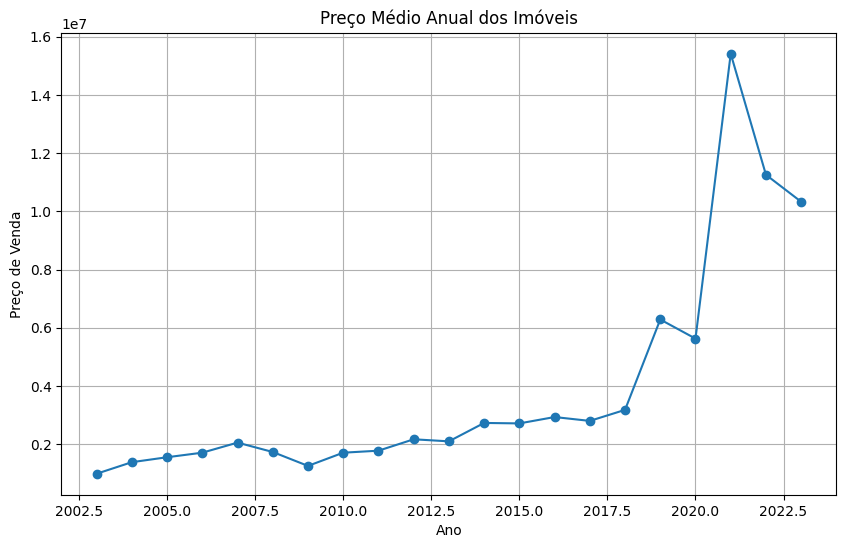

In [21]:
# Group by year and calculate the average sale price
df_ano = df4.groupby(df["YEAR_SOLD"])["SALE PRICE"].mean().reset_index()

# Cria o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_ano["YEAR_SOLD"], df_ano["SALE PRICE"], marker='o', linestyle='-')
plt.title("Preço Médio Anual dos Imóveis")
plt.xlabel("Ano")
plt.ylabel("Preço de Venda")
plt.grid(True)
plt.show()

In [ ]:
# Add new columns that reinterpret existing ones

df5 = df4.copy()

# ADD DISTANCE TO CENTRAL PARK
# Aproximates Central Park's shape
CENTRAL_PARK_CORDS = [
    (40.768234, -73.981008),
    (40.800278, -73.958016),
    (40.796762, -73.949710),
    (40.765106, -73.973197),
    (40.768234, -73.981008)  # Back to start
]

# Create polygon
CENTRAL_PARK_POLY = Polygon(CENTRAL_PARK_CORDS)
def DistanceToCentralPark(row):
    point = Point(row['LATITUDE'], row['LONGITUDE'])
    return CENTRAL_PARK_POLY.distance(point)

df5['DISTANCE TO CENTRAL PARK'] = df5.apply(DistanceToCentralPark, axis=1)

# ADD DISTANCE TO MANHATTAN CENTER
MANHATTAN_CENTER = (40.7831, -73.9712)

0.0 0.08412361030114782



Training Random Forest...

Training XGBoost...

Training CatBoost...

Training Extra Trees...

Model Comparison:
--------------------------------------------------------------------------------
Model                      RMSE         R2             MAE    CV Mean     CV Std
--------------------------------------------------------------------------------
Random Forest   $  1,752,639.61     0.5509 $    755,626.00     0.4478     0.0437
XGBoost         $  1,758,317.06     0.5479 $    759,572.71     0.4575     0.0375
CatBoost        $  1,881,094.90     0.4826 $    831,123.47     0.4171     0.0366
Extra Trees     $  1,796,223.11     0.5282 $    776,488.31     0.4248     0.0310

Top 15 Most Important Features (Random Forest):
                     feature  importance
5                   LATITUDE    0.127906
9   DISTANCE TO CENTRAL PARK    0.116012
4          GROSS SQUARE FEET    0.114489
10            LOG_GROSS_SQFT    0.108255
6                  LONGITUDE    0.107755
16        DISTANCE_TO_CE

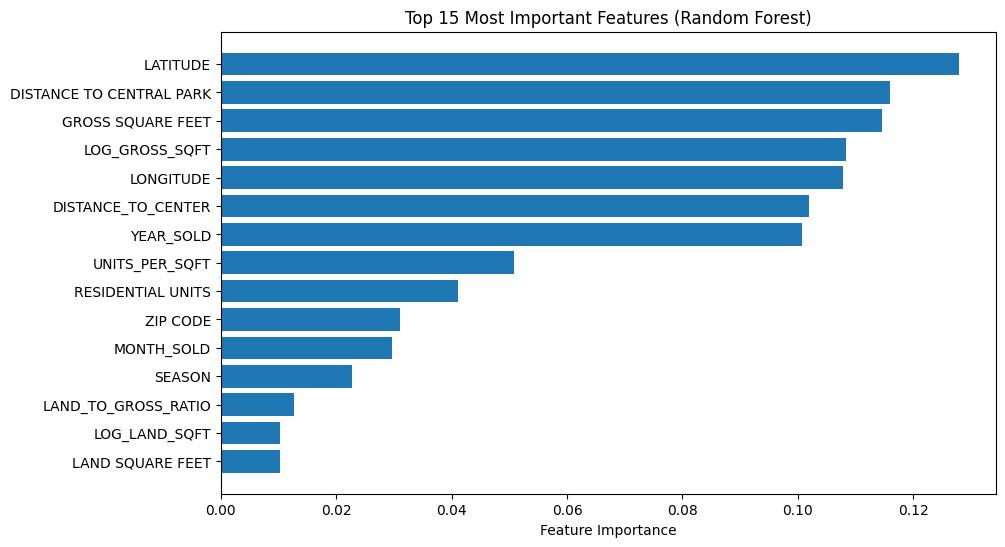

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Select features
X = df5.drop(columns=['SALE PRICE', 'ADDRESS', 'NEIGHBORHOOD'])
y = df5['SALE PRICE']

def enhance_features(X):
    X_new = X.copy()
    
    # Log transform area features
    X_new['LOG_GROSS_SQFT'] = np.log1p(X_new['GROSS SQUARE FEET'])
    X_new['LOG_LAND_SQFT'] = np.log1p(X_new['LAND SQUARE FEET'])
    
    # Unit features
    X_new['TOTAL_UNITS'] = X_new['RESIDENTIAL UNITS'] + X_new['COMMERCIAL UNITS']
    X_new['LOG_TOTAL_UNITS'] = np.log1p(X_new['TOTAL_UNITS'])
    
    # Density metrics
    X_new['UNITS_PER_SQFT'] = X_new['TOTAL_UNITS'] / (X_new['GROSS SQUARE FEET'] + 1)
    X_new['LAND_TO_GROSS_RATIO'] = X_new['LAND SQUARE FEET'] / (X_new['GROSS SQUARE FEET'] + 1)
    
    # Location features
    X_new['DISTANCE_TO_CENTER'] = np.sqrt(
        (X_new['LATITUDE'] - X_new['LATITUDE'].mean())**2 + 
        (X_new['LONGITUDE'] - X_new['LONGITUDE'].mean())**2
    )
    
    # Time features
    X_new['SEASON'] = np.sin(2 * np.pi * X_new['MONTH_SOLD'] / 12)
    
    # Commercial density
    X_new['COMMERCIAL_RATIO'] = X_new['COMMERCIAL UNITS'] / (X_new['TOTAL_UNITS'] + 1)
    
    return X_new

def remove_outliers(df, target, columns, n_std=3):
    df_clean = df.copy()
    y_clean = target.copy()
    
    # Remove price outliers first
    price_mean = y_clean.mean()
    price_std = y_clean.std()
    price_mask = abs(y_clean - price_mean) <= (n_std * price_std)
    df_clean = df_clean[price_mask]
    y_clean = y_clean[price_mask]
    
    # Remove feature outliers
    for col in columns:
        mean = df_clean[col].mean()
        std = df_clean[col].std()
        mask = abs(df_clean[col] - mean) <= (n_std * std)
        df_clean = df_clean[mask]
        y_clean = y_clean[mask]
    
    return df_clean, y_clean

# Prepare features
X_engineered = enhance_features(X)

# Define columns for outlier removal
outlier_columns = ['GROSS SQUARE FEET', 'LAND SQUARE FEET', 'TOTAL_UNITS', 'UNITS_PER_SQFT', 'LAND_TO_GROSS_RATIO']

# Remove outliers
X_clean, y_clean = remove_outliers(X_engineered, y, outlier_columns)

# Scale features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_clean)
X_scaled = pd.DataFrame(X_scaled, columns=X_clean.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=500,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),
    'XGBoost': XGBRegressor(
        n_estimators=500,
        max_depth=7,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    'CatBoost': CatBoostRegressor(
        iterations=500,
        depth=7,
        learning_rate=0.05,
        subsample=0.66,
        random_state=42,
        verbose=False
    ),
    'Extra Trees': ExtraTreesRegressor(
        n_estimators=500,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_scaled, y_clean, cv=5, scoring='r2')
    
    # Store results
    results[name] = {
        'RMSE': rmse,
        'R2': r2,
        'MAE': mae,
        'CV_mean': cv_scores.mean(),
        'CV_std': cv_scores.std()
    }

# Print results
print("\nModel Comparison:")
print("-" * 80)
print(f"{'Model':<15} {'RMSE':>15} {'R2':>10} {'MAE':>15} {'CV Mean':>10} {'CV Std':>10}")
print("-" * 80)

for name, metrics in results.items():
    print(f"{name:<15} ${metrics['RMSE']:>14,.2f} {metrics['R2']:>10.4f} ${metrics['MAE']:>14,.2f} {metrics['CV_mean']:>10.4f} {metrics['CV_std']:>10.4f}")

# Get best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]

# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_clean.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 15 Most Important Features ({best_model_name}):")
    print(feature_importance.head(15))
print(f"\nTop 15 Most Important Features ({best_model_name}):")
print(feature_importance.head(15))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'].head(15), feature_importance['importance'].head(15))
plt.xlabel('Feature Importance')
plt.title(f'Top 15 Most Important Features ({best_model_name})')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [25]:
# Check model accuracy

# Para fazer predições com múltiplos dados
varios_dados = pd.DataFrame({ 
    'ZIP CODE': [10022, 10028, 0],
    'RESIDENTIAL UNITS': [1, 1, 0],
    'COMMERCIAL UNITS': [0, 0, 0],
    'LAND SQUARE FEET': [0, 0, 0],
    'GROSS SQUARE FEET': [1600, 5000, 0],
    'LATITUDE': [40.759486, 40.774235, 0],
    'LONGITUDE': [-73.964601, -73.953697, 0],
    'YEAR_SOLD': [2025, 2025, 0],
    'MONTH_SOLD': [1, 1, 0]
})

real_prices = [700_000, 6_250_000, 0]

# Preparar múltiplos dados
varios_dados_preparados = enhance_features(varios_dados)

# Fazer predições múltiplas
precos_previstos = best_model.predict(varios_dados_preparados)

# Mostrar resultados
for i, preco in enumerate(precos_previstos):
    print(f"Propriedade {i+1}: Predicted ${preco:,.2f} | Real ${real_prices[i]:,.2f}")

Propriedade 1: Predicted $2,738,509.67 | Real $700,000.00
Propriedade 2: Predicted $5,291,595.08 | Real $6,250,000.00
Propriedade 3: Predicted $2,822,433.56 | Real $0.00
